<a href="https://colab.research.google.com/github/AdrianCCT/Fundamental-of-Statistics-of-DA/blob/main/Data_Analytics_Visualization_Adrian_Tomal_CA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries and data set Import

In [ ]:
# I will import all libraries that I will need
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE

In [ ]:
#Loading data set
file_path = "/content/glass_data.csv"
df = pd.read_csv(file_path) # i named it df as it is most common and it is short , same as Numpy is np for example

# EDA


## Basic EDA

In [ ]:
#basic dataset information
df.head()


,id,ri,na,mg,al,si,k,ca,ba,fe,type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
df.shape

(214, 11)

In [ ]:
# checking data type (all numerical so is all good)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      214 non-null    int64  
 1   ri      214 non-null    float64
 2   na      214 non-null    float64
 3   mg      214 non-null    float64
 4   al      214 non-null    float64
 5   si      214 non-null    float64
 6   k       214 non-null    float64
 7   ca      214 non-null    float64
 8   ba      214 non-null    float64
 9   fe      214 non-null    float64
 10  type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [ ]:
#Sometimes, when data is imported from a CSV file, column names may contain leading/trailing spaces or invisible characters, Renaming columns for consistency (just in case)
df.columns = ['id', 'ri', 'na', 'mg', 'al', 'si', 'k', 'ca', 'ba', 'fe', 'type']

In [ ]:
# ID is just index column, it has no use
df.drop(columns=['id'], inplace=True)

In [ ]:
# we can see below there are no missing values (we could alos see that by df.info)
df.isnull().sum()

,0
ri,0
na,0
mg,0
al,0
si,0
k,0
ca,0
ba,0
fe,0
type,0


In [ ]:
#checking for duplicates , it seems we have one
df.duplicated().sum()

1

In [ ]:
# these are duplicated rows
df[df.duplicated(keep=False)]

,ri,na,mg,al,si,k,ca,ba,fe,type
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [ ]:
#dropping duplicates as the type of glass is identical
df = df.drop_duplicates()

In [ ]:
#quick check
df.duplicated().sum()

0

## EDA & Trends - Visualizations


# we can see that data is imbalanced (I will apply SMOTE for Oversampling, of lower quantity glass types as under sampling would not work as number of data would be too low  )
plt.figure(figsize=(8, 5))
sns.countplot(x=df["type"])
plt.title("Class Distribution of Glass Types")
plt.show()

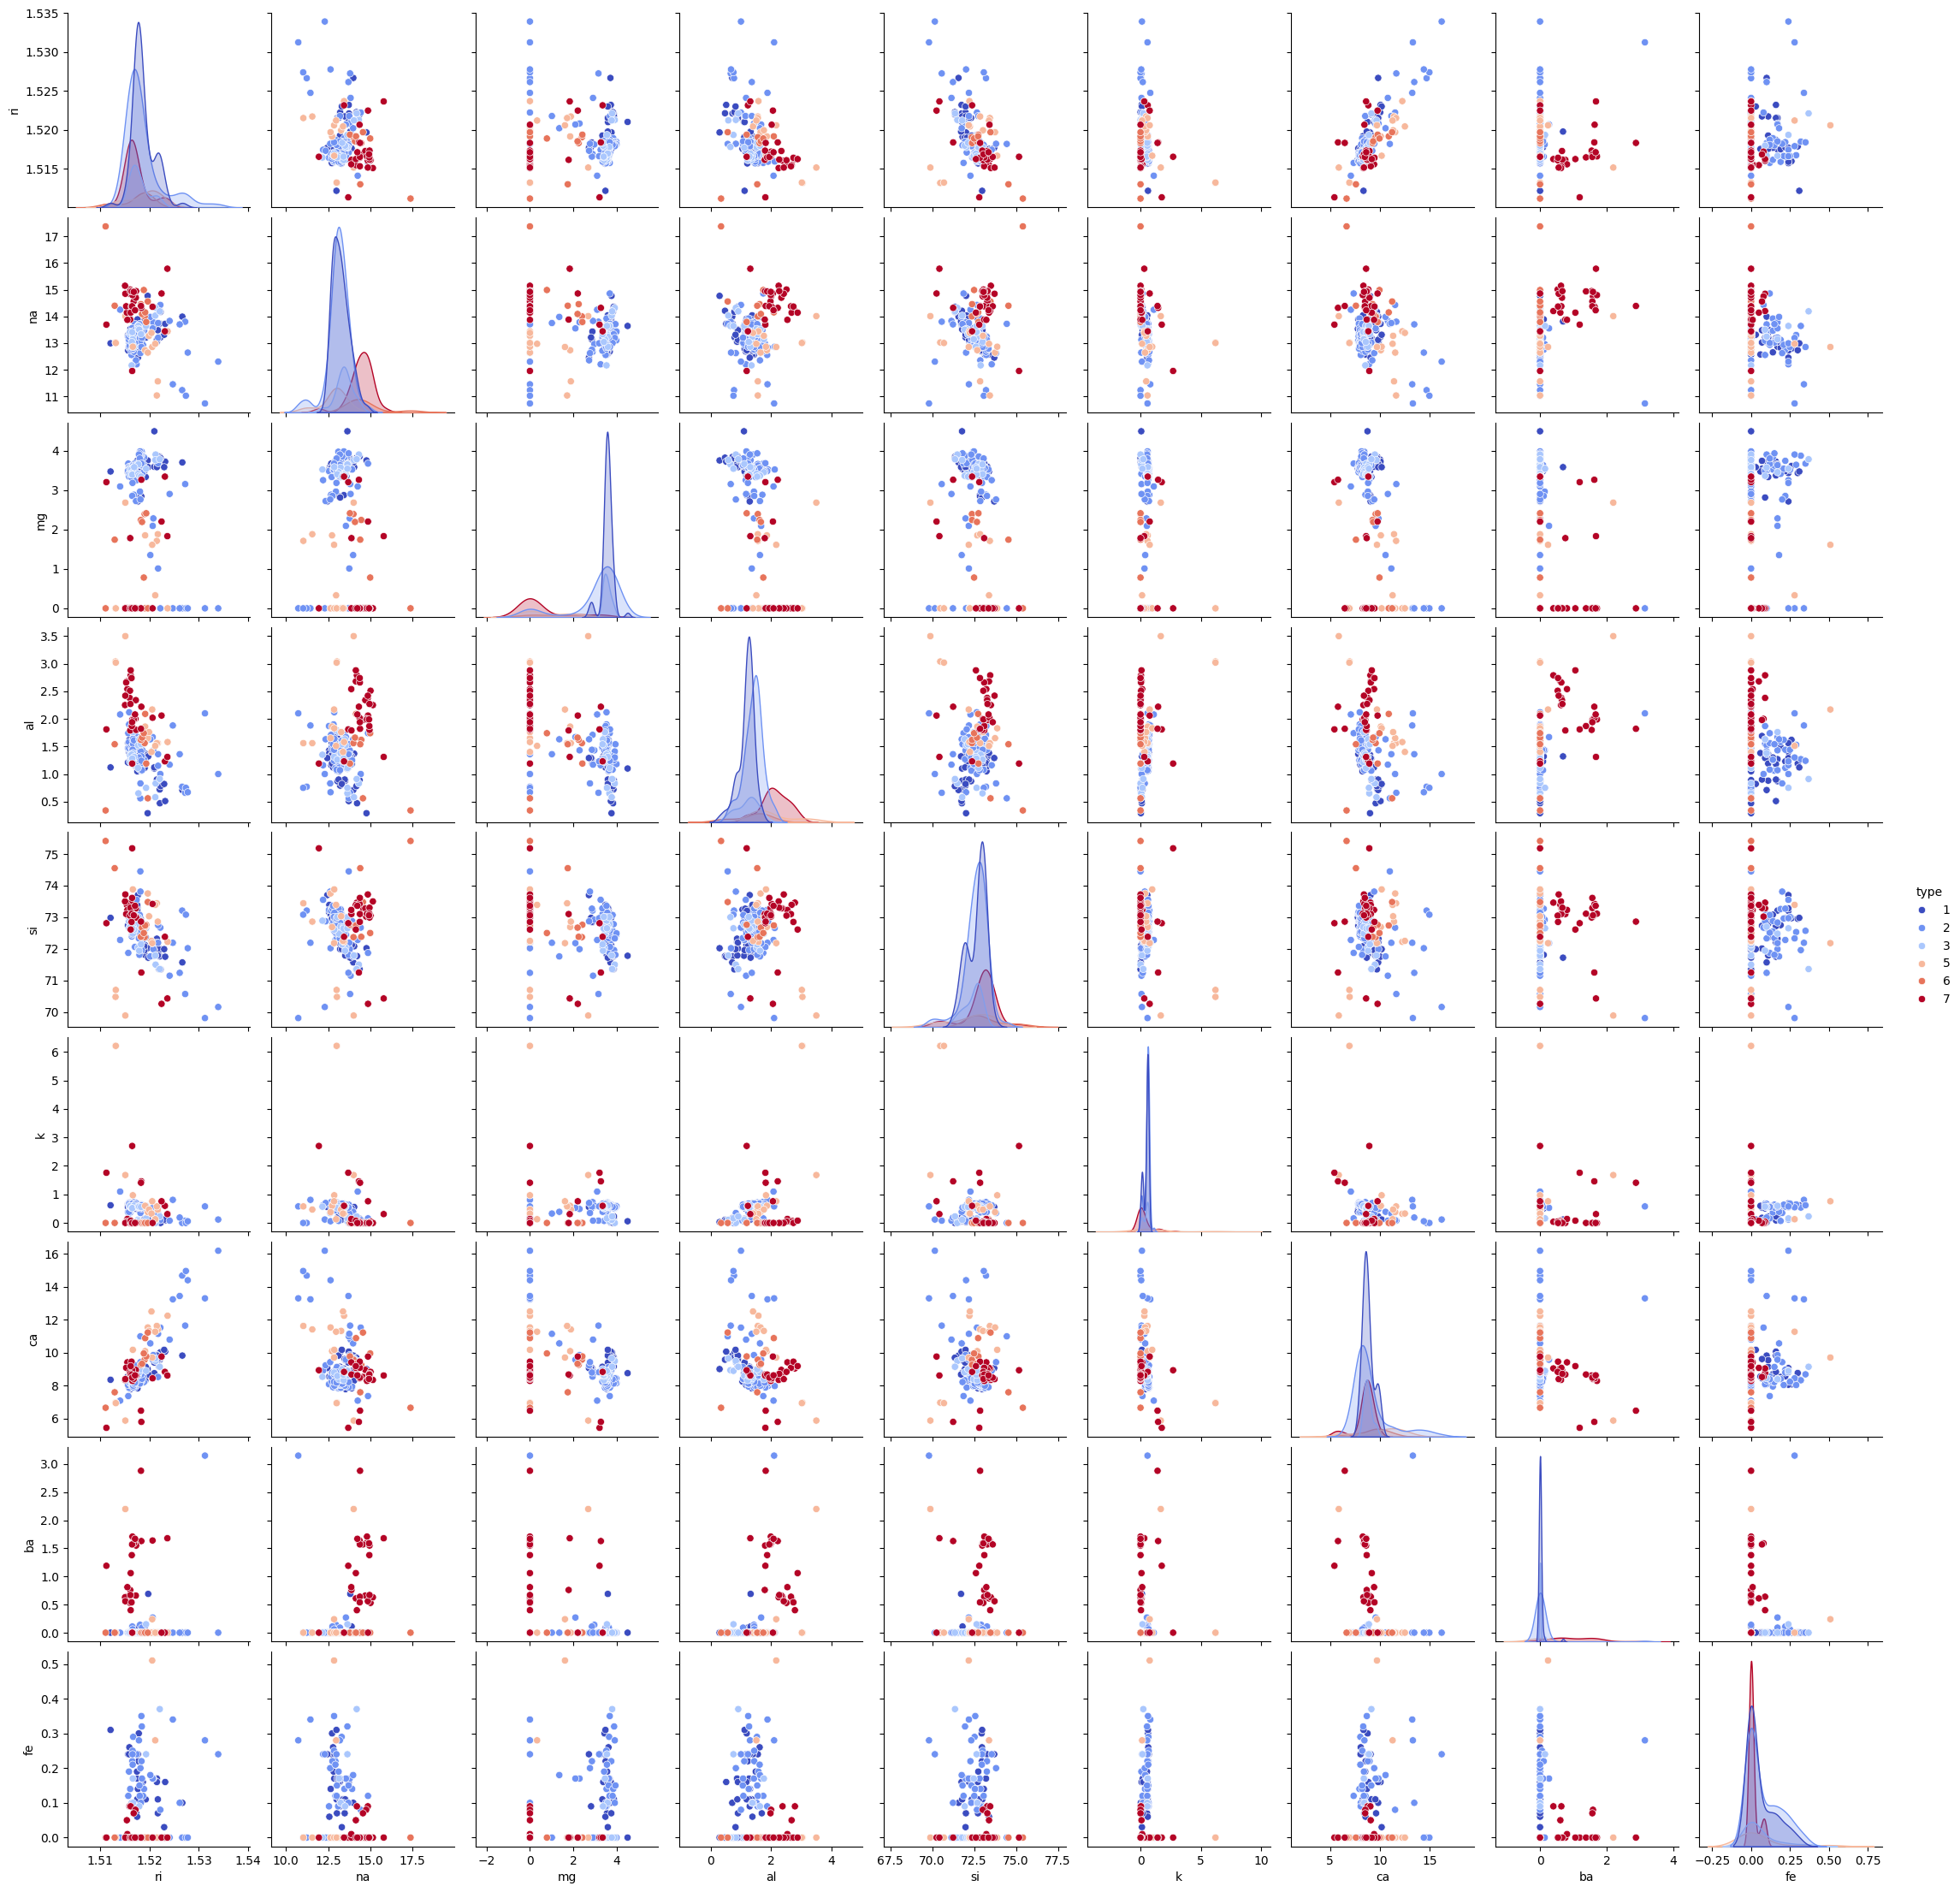

In [ ]:
# we can see what type of glass contais what type of mineral mostly
sns.pairplot(df, hue="type", palette="coolwarm")
plt.show()

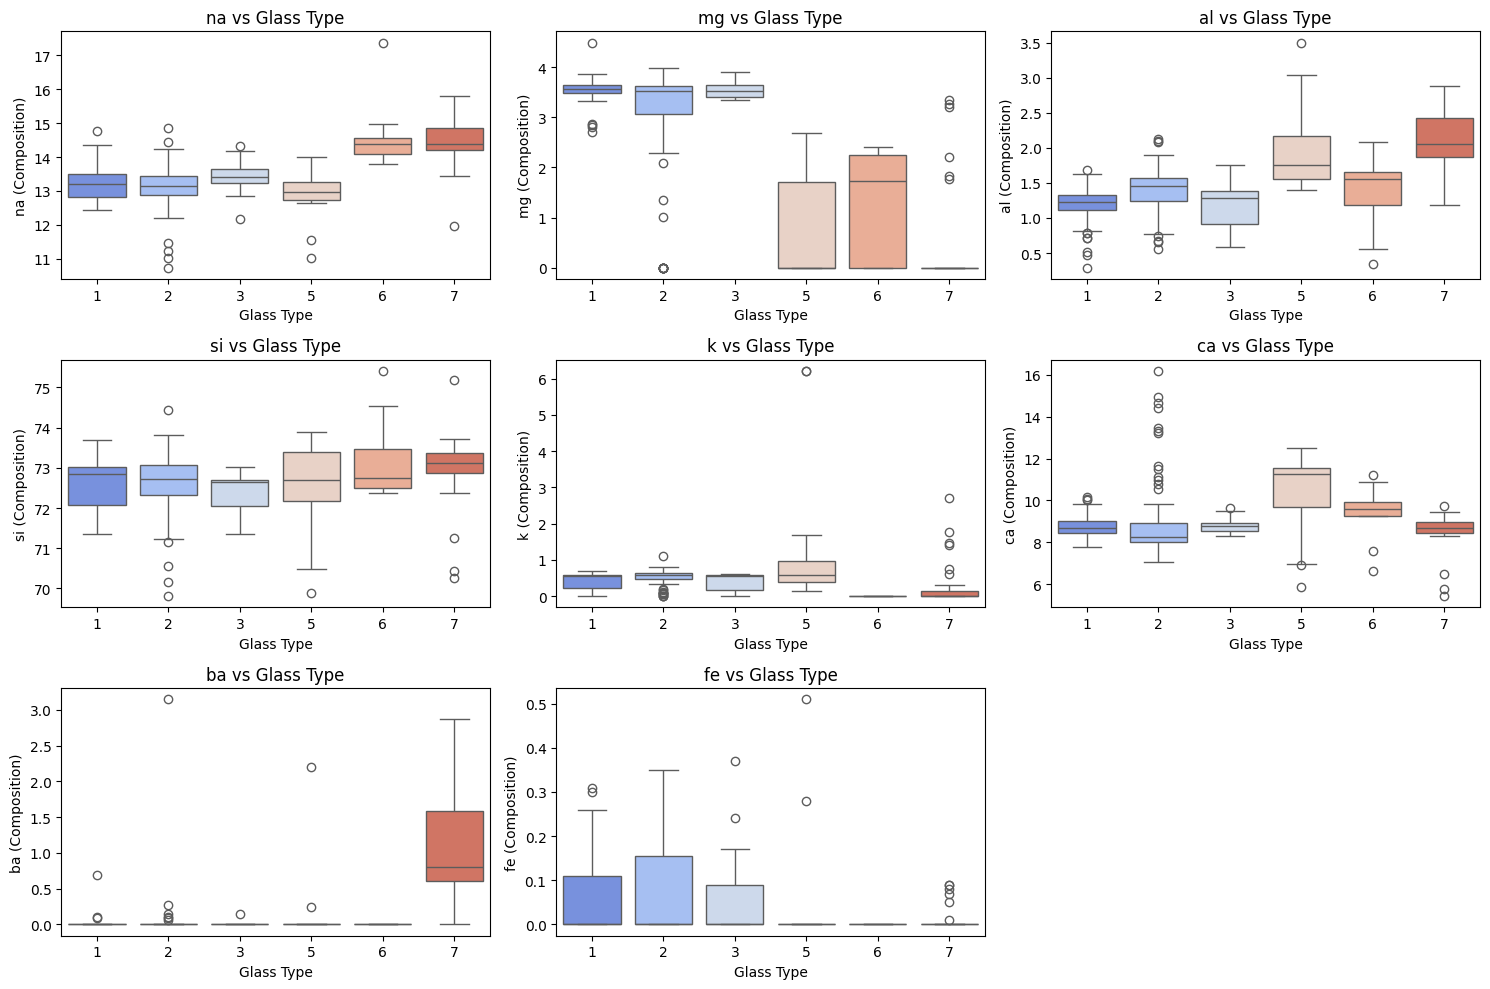

In [ ]:
import warnings
warnings.filterwarnings("ignore")
# figure size
plt.figure(figsize=(15, 10))

# I will Loop through each mineral column and plot boxplot (very interesting actually :))
for i, col in enumerate(df.columns[1:-1]):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df["type"], y=df[col], palette="coolwarm")
    plt.title(f"{col} vs Glass Type")
    plt.xlabel("Glass Type")
    plt.ylabel(f"{col} (Composition)")

plt.tight_layout()
plt.show()

## Outliers Detection

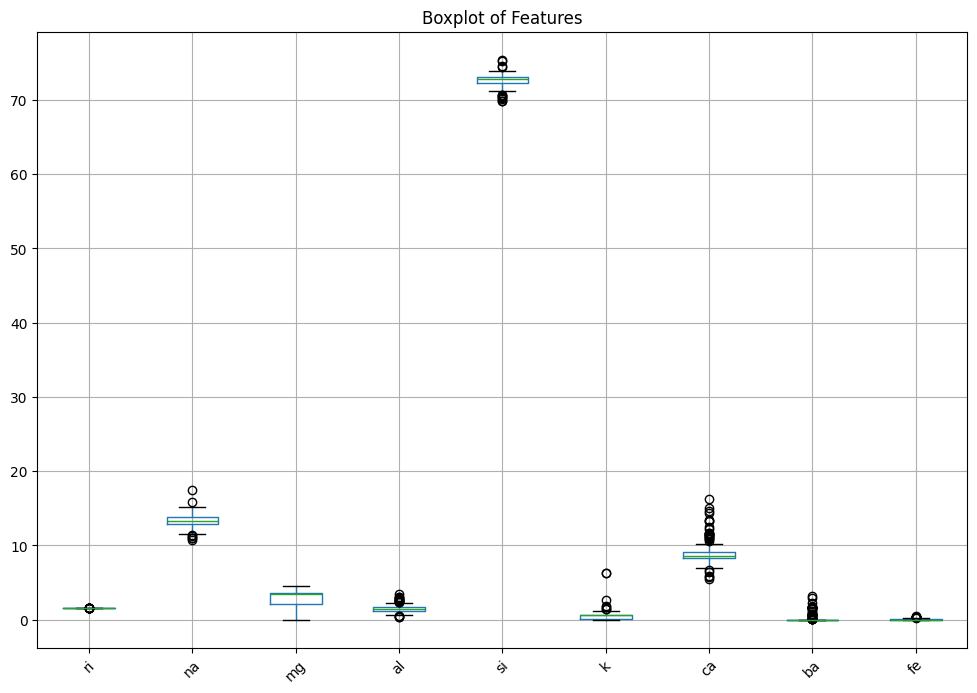

In [ ]:
plt.figure(figsize=(12, 8))
df.drop(columns=["type"]).boxplot(rot=45)
plt.title("Boxplot of Features")
plt.show()


In [ ]:
# Outlier Detection & Handling using IQR :  I used 10th and 90th percentile to keep more data , otherwise too much variation in mineral compostition was being removed that has actual pattern in types of glass for example Barium.
#Esepecially for Iron and Barium , barium pattern is being completle removed from glass type 7 wiht higher percentile IQR.
Q1 = df.quantile(0.1)
Q3 = df.quantile(0.9)
IQR = Q3 - Q1
df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5* IQR))).any(axis=1)]
print(f"Original dataset size: {df.shape[0]}, After outlier removal: {df_no_outliers.shape[0]}")

Original dataset size: 213, After outlier removal: 196


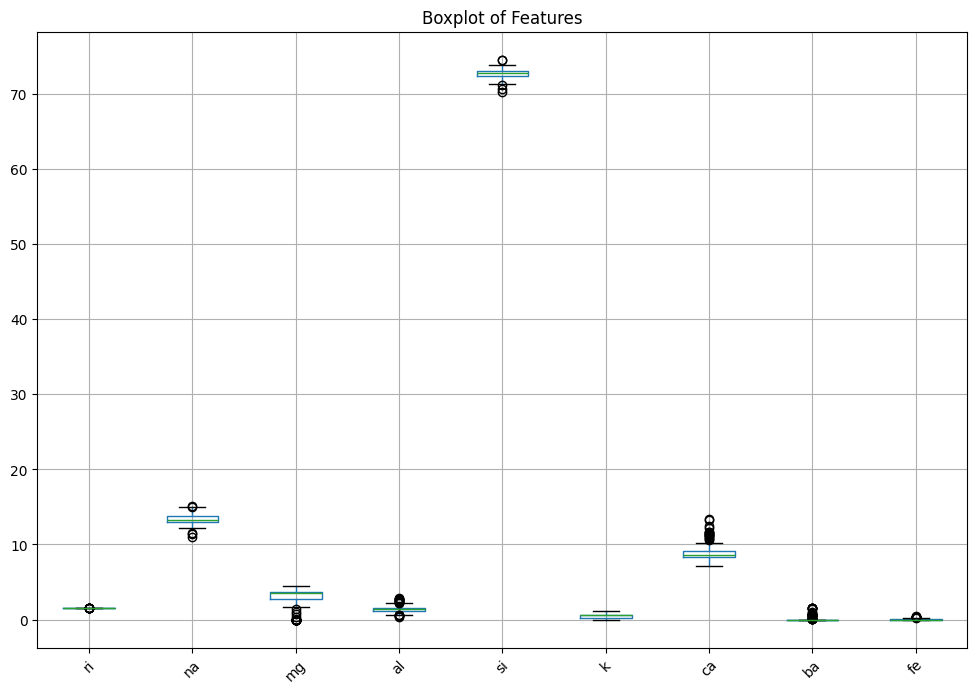

In [ ]:
plt.figure(figsize=(12, 8))
df_no_outliers.drop(columns=["type"]).boxplot(rot=45)
plt.title("Boxplot of Features")
plt.show()
#I completed quick check to see if number of type of glass remanined similar and that there are no extreme values

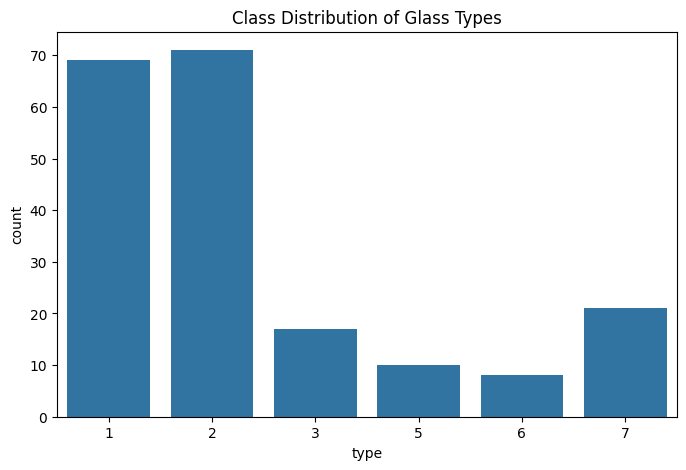

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df_no_outliers["type"])
plt.title("Class Distribution of Glass Types")
plt.show()

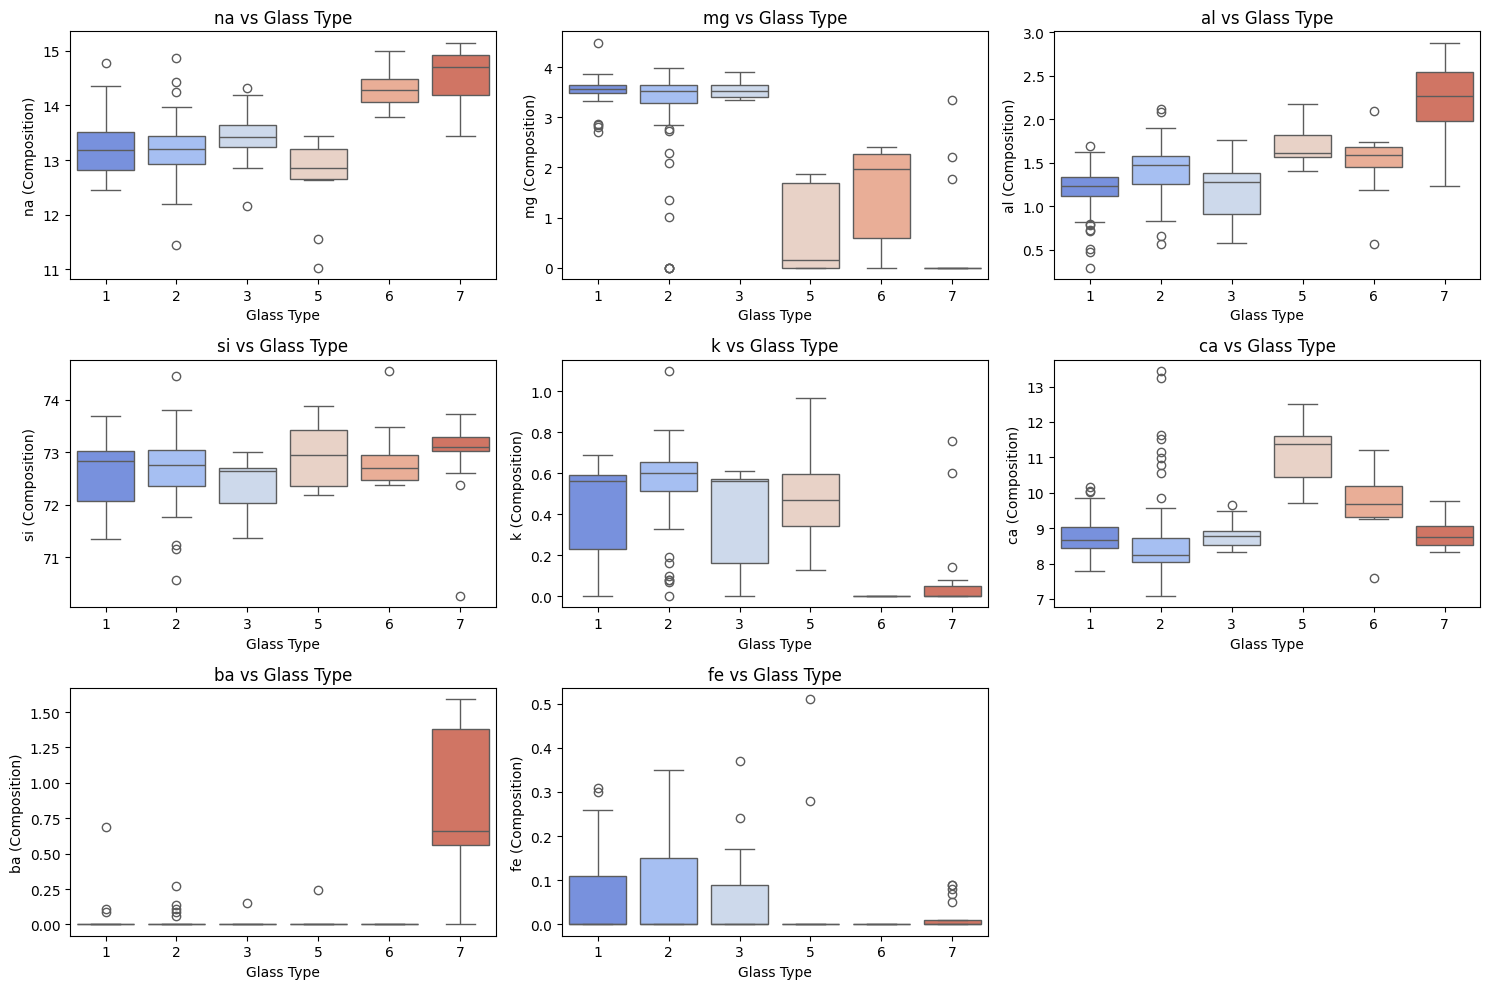

In [ ]:
plt.figure(figsize=(15, 10))

# Loop through each mineral column and plot boxplot
for i, col in enumerate(df_no_outliers.columns[1:-1]):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df_no_outliers["type"], y=df_no_outliers[col], palette="coolwarm")  # Fixed column access
    plt.title(f"{col} vs Glass Type")
    plt.xlabel("Glass Type")
    plt.ylabel(f"{col} (Composition)")

plt.tight_layout()
plt.show()

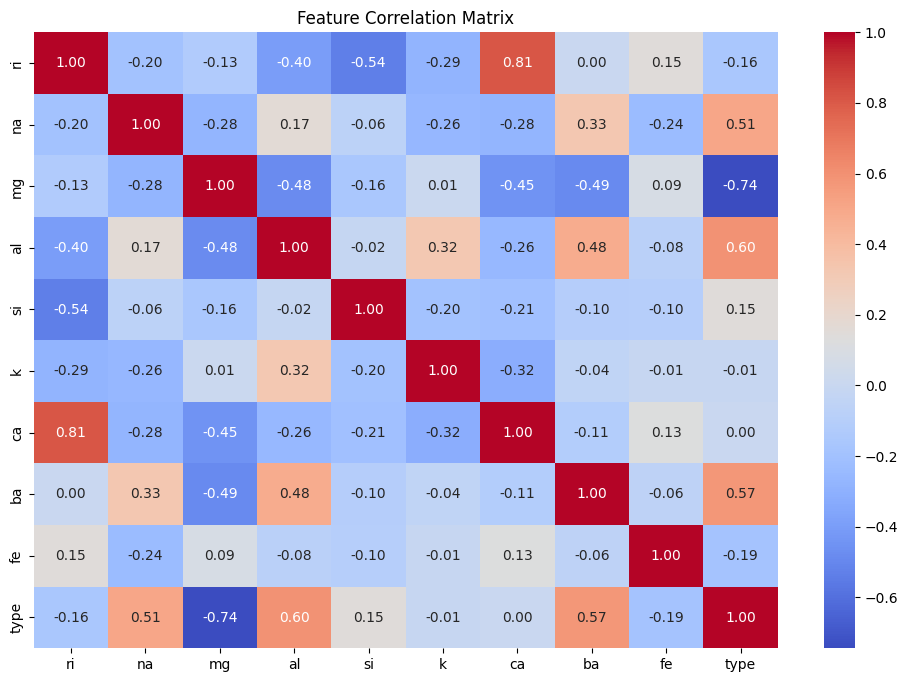

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# Descriptive and Inferential statistical analysis

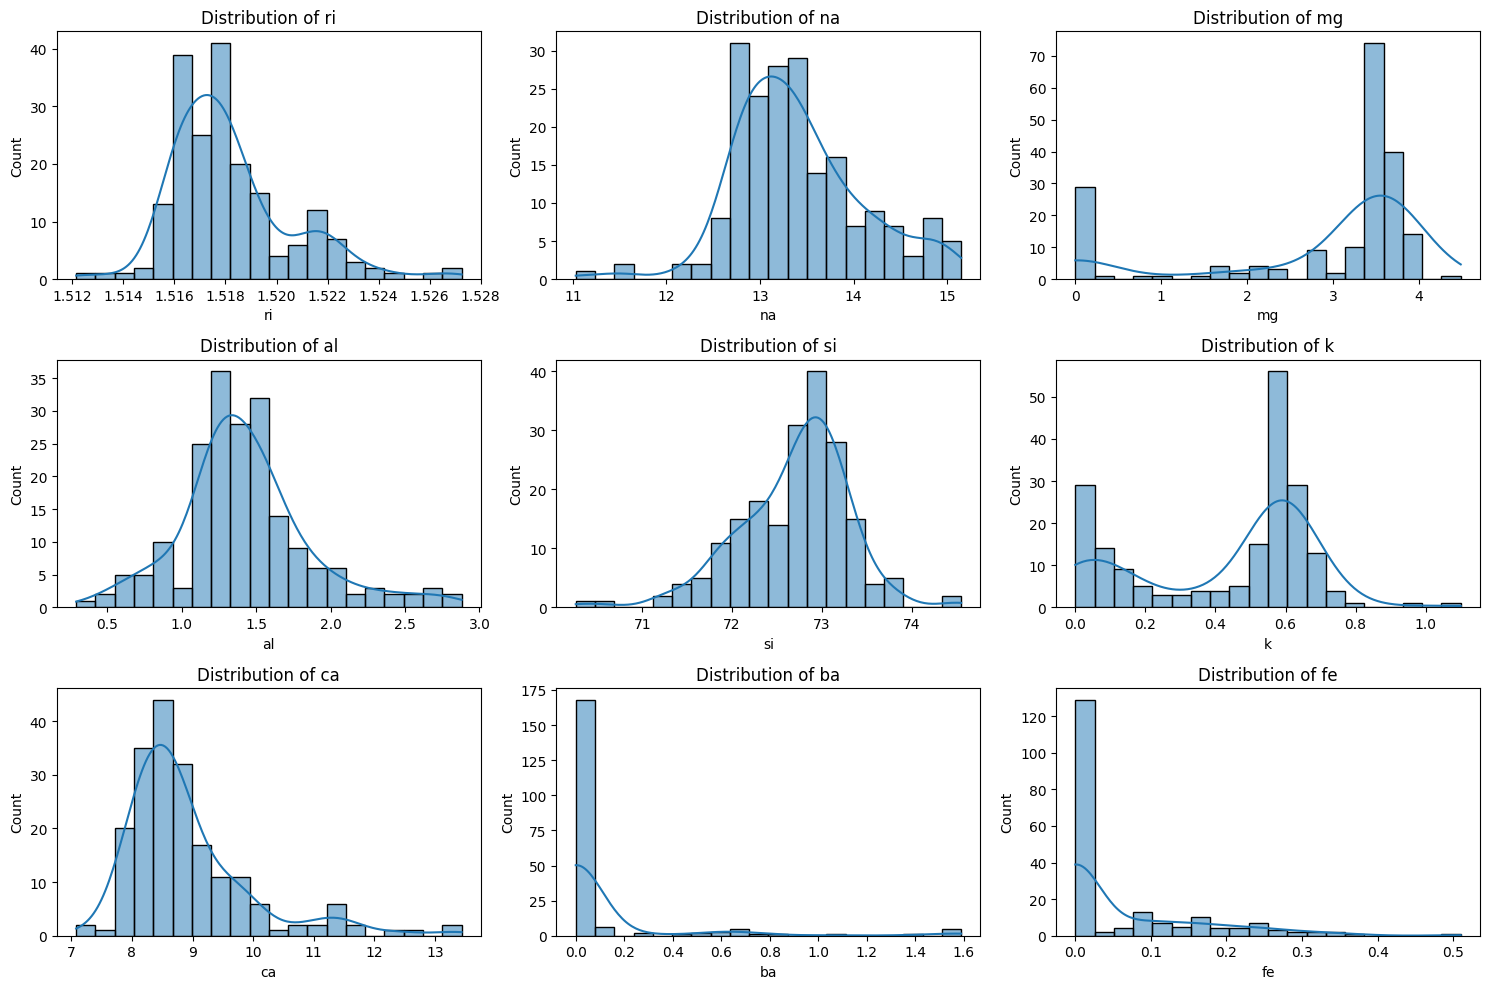

In [ ]:
# Visualizing distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(df_no_outliers.columns[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df_no_outliers[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

In [ ]:
from scipy import stats
anova_results = {}
for col in df_no_outliers.columns[:-1]:
    groups = [df_no_outliers[df_no_outliers["type"] == t][col] for t in df_no_outliers["type"].unique()]
    f_stat, p_value = stats.f_oneway(*groups)
    anova_results[col] = {"F-Statistic": f_stat, "P-Value": p_value}

anova_df = pd.DataFrame(anova_results).T
print("ANOVA Results:\n", anova_df)
#The ANOVA results show that most minerals (except Fe) have very low p-values (<0.05), meaning their composition is different across different glass types, with Mg, Ba, Na, and Al showing the strongest differences.

ANOVA Results:
     F-Statistic       P-Value
ri     4.412992  7.968395e-04
na    33.719827  1.449335e-24
mg    93.432983  2.719186e-49
al    43.668596  7.651241e-30
si     2.976869  1.303169e-02
k     24.823010  3.273946e-19
ca    16.074079  3.331041e-13
ba    85.334205  1.099118e-46
fe     1.948289  8.823267e-02


In [ ]:
print(df_no_outliers.describe())
#This table summarizes the dataset by showing the count, mean, standard deviation, and range (min, max, and quartiles) of all minerals, highlighting that silicon is the most common, magnesium varies significantly, and barium is mostly absent but gets to 1.59% in some cases

               ri          na          mg          al          si           k  \
count  196.000000  196.000000  196.000000  196.000000  196.000000  196.000000   
mean     1.518193   13.399031    2.855612    1.424031   72.695663    0.427347   
std      0.002365    0.687961    1.322614    0.438144    0.611954    0.255777   
min      1.512150   11.030000    0.000000    0.290000   70.260000    0.000000   
25%      1.516543   12.930000    2.797500    1.190000   72.337500    0.147500   
50%      1.517670   13.295000    3.500000    1.360000   72.790000    0.560000   
75%      1.519060   13.757500    3.610000    1.587500   73.080000    0.602500   
max      1.527250   15.150000    4.490000    2.880000   74.550000    1.100000   

               ca          ba          fe        type  
count  196.000000  196.000000  196.000000  196.000000  
mean     8.911786    0.100561    0.059592    2.586735  
std      1.033961    0.311157    0.098339    1.976173  
min      7.080000    0.000000    0.000000    1

## Feature importance (RandomForest)

In [ ]:
# Feature Importance - RandomForest
X_features = df_no_outliers.drop(columns=["type"])
y_target = df_no_outliers["type"]

rf_importance = RandomForestClassifier()
rf_importance.fit(X_features, y_target)
importance_values = pd.Series(rf_importance.feature_importances_, index=X_features.columns)


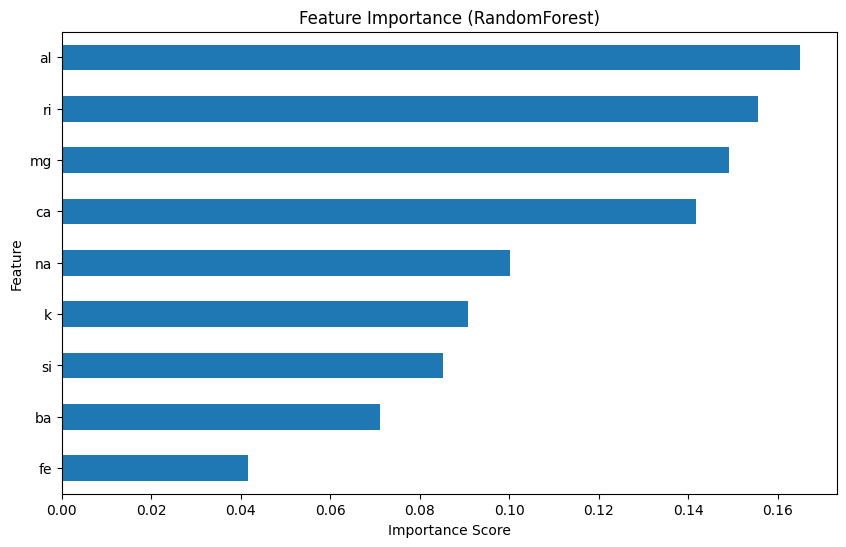

In [ ]:
# Plot feature importance
plt.figure(figsize=(10, 6))
importance_values.sort_values().plot(kind='barh')
plt.title("Feature Importance (RandomForest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# Machine learning predictions

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# spliting to target variable
X_features = df_no_outliers.drop(columns=["type"])
y_target = df_no_outliers["type"]

# Split data into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42, stratify=y_target)

# Training RandomForest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Test set
rf_pred = rf_classifier.predict(X_test)

# Overall Model Accuracy

# Calculate and store the accuracy
rf_accuracy = accuracy_score(y_test, rf_pred)

# Calculating the confusion matrix
rf_confusion_matrix = confusion_matrix(y_test, rf_pred)

#overall accuracy
print(f"Random Forest Model Accuracy: {rf_accuracy:.2f}")

# Confusion Matrix results
print("\nConfusion Matrix:")
print(rf_confusion_matrix)

Random Forest Model Accuracy: 0.85

Confusion Matrix:
[[12  2  0  0  0  0]
 [ 2 13  0  0  0  0]
 [ 1  1  1  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  4]]


85% is quite good but not good enough , Will need improve the model accuracy

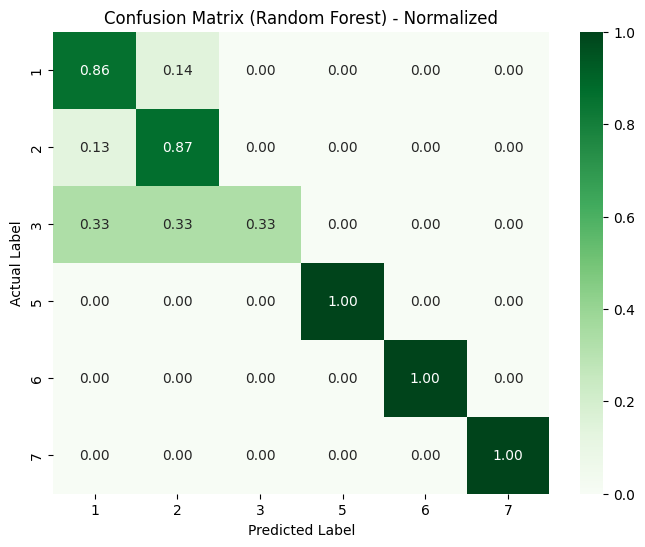

In [ ]:
# I normalize the confusion matrix to show percentages instead of counts
conf_matrix_normalized = rf_confusion_matrix.astype('float') / rf_confusion_matrix.sum(axis=1)[:, np.newaxis]

# Plot Confusion Matrix as Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_normalized, annot=True, fmt=".2f", cmap="Greens",
            xticklabels=y_target.unique(), yticklabels=y_target.unique())

plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix (Random Forest) - Normalized")
plt.show()


## Balancing Data, Feature Seletion & model tunning

As Previously mentioned I will Apply SMOTE to do oversampling , and balanced the data across all 7 glass types

In [ ]:
X_class = df_no_outliers.drop(columns=["type"])
y_class = df_no_outliers["type"]

smote = SMOTE(random_state=42)
X_class, y_class = smote.fit_resample(X_class, y_class)

# Train test split
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42, stratify=y_class
)

# Scaling features
scaler = StandardScaler()
X_train_class = scaler.fit_transform(X_train_class)
X_test_class = scaler.transform(X_test_class)


In [ ]:
y_class.shape

(426,)

In [ ]:
#Feature Selection using RFE (Recursive Feature Elimination)
log_reg = LogisticRegression(max_iter=1000)
rfe = RFE(log_reg, n_features_to_select=5)
rfe.fit(X_train_class, y_train_class)
selected_features = X_class.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['na', 'mg', 'al', 'k', 'ba'], dtype='object')


In [ ]:
# After RFE and SMOTE
X_train_selected = X_train_class[:, X_class.columns.get_indexer(['na', 'mg', 'al', 'k', 'ba'])]
X_test_selected = X_test_class[:, X_class.columns.get_indexer(['na', 'mg', 'al', 'k', 'ba'])]

# Train
rf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selected.fit(X_train_selected, y_train_class)

# Accuracy
accuracy_selected = accuracy_score(y_test_class, rf_selected.predict(X_test_selected))

print(f"Accuracy with Selected Features: {accuracy_selected:.2f}")

Accuracy with Selected Features: 0.87


In [ ]:
# RandomForest with ALL features after SMOTE
rf_all_features = RandomForestClassifier(n_estimators=100, random_state=42)
rf_all_features.fit(X_train_class, y_train_class)

# Prediction and accuracy
rf_pred_all = rf_all_features.predict(X_test_class)
accuracy_all = accuracy_score(y_test_class, rf_pred_all)

print(f"Accuracy with All Features: {accuracy_all:.2f}")

Accuracy with All Features: 0.95


In [ ]:
# Hyperparameter Tuning to increae model accuracy.
# parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

#  Grid Search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_class, y_train_class)

# Best model
best_rf = grid_search.best_estimator_
accuracy_tuned = accuracy_score(y_test_class, best_rf.predict(X_test_class))

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy After Hyperparameter Tuning: {accuracy_tuned:.2f}")

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy After Hyperparameter Tuning: 0.93


In [ ]:
# Initialize models
knn = KNeighborsClassifier(n_neighbors=5)
dt = DecisionTreeClassifier(max_depth=10, random_state=42)

# Training models
knn.fit(X_train_class, y_train_class)
dt.fit(X_train_class, y_train_class)

# Predict and Evaluate
accuracy_knn = accuracy_score(y_test_class, knn.predict(X_test_class))
accuracy_dt = accuracy_score(y_test_class, dt.predict(X_test_class))

print(f"KNN Accuracy: {accuracy_knn:.2f}")
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")

KNN Accuracy: 0.85
Decision Tree Accuracy: 0.88


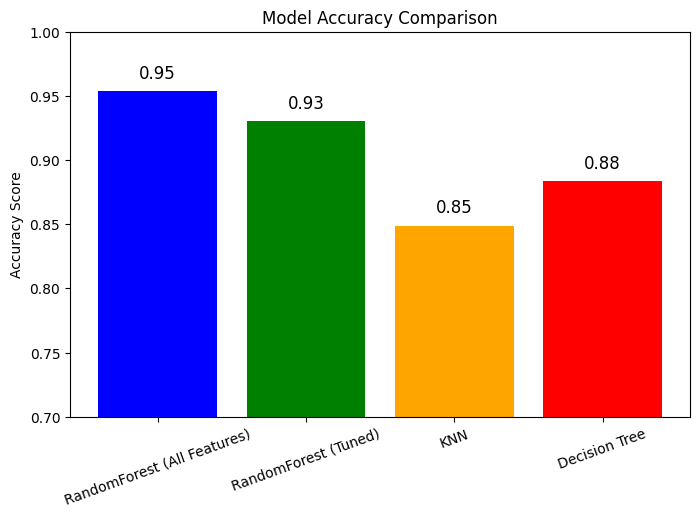

In [ ]:
# Model accuracy comparision
model_names = ["RandomForest (All Features)", "RandomForest (Tuned)", "KNN", "Decision Tree"]
accuracy_scores = [accuracy_all, accuracy_tuned, accuracy_knn, accuracy_dt]

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracy_scores, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0.7, 1)  # Ensuring the y-axis starts near the lowest accuracy
plt.ylabel("Accuracy Score")
plt.title("Model Accuracy Comparison")

# adding accuracy score on the top .
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontsize=12)

plt.xticks(rotation=20)
plt.show()

In [ ]:
# Train the best model (RandomForest with all features)
best_rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
best_rf_model.fit(X_train_class, y_train_class)

# Make predictions
rf_best_pred = best_rf_model.predict(X_test_class)

# Evaluate the model
best_rf_accuracy = accuracy_score(y_test_class, rf_best_pred)
best_rf_report = classification_report(y_test_class, rf_best_pred)
best_rf_conf_matrix = confusion_matrix(y_test_class, rf_best_pred)

# Print final results
print(f"Final Best Model Accuracy: {best_rf_accuracy:.2f}")
print("\nClassification Report:")
print(best_rf_report)
print("\nConfusion Matrix:")
print(best_rf_conf_matrix)

Final Best Model Accuracy: 0.95

Classification Report:
              precision    recall  f1-score   support

           1       0.93      0.93      0.93        14
           2       0.92      0.86      0.89        14
           3       0.87      0.93      0.90        14
           5       1.00      1.00      1.00        15
           6       1.00      1.00      1.00        15
           7       1.00      1.00      1.00        14

    accuracy                           0.95        86
   macro avg       0.95      0.95      0.95        86
weighted avg       0.95      0.95      0.95        86


Confusion Matrix:
[[13  1  0  0  0  0]
 [ 0 12  2  0  0  0]
 [ 1  0 13  0  0  0]
 [ 0  0  0 15  0  0]
 [ 0  0  0  0 15  0]
 [ 0  0  0  0  0 14]]


The RandomForest model achieved 95% accuracy, making it the best choice for classification. It correctly predicted most glass types , meaning very few mistakes. The confusion matrix shows that most predictions were accurate, with only a few misclassifications. Since this model performs the best, I will use it as the final classification model.

In [ ]:
# Check the final RandomForest model on the training data
final_rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
final_rf_model.fit(X_train_class, y_train_class)

# Predictions on Training Data
y_train_pred = final_rf_model.predict(X_train_class)
train_accuracy = accuracy_score(y_train_class, y_train_pred)
train_classification_report = classification_report(y_train_class, y_train_pred)
train_confusion_matrix = confusion_matrix(y_train_class, y_train_pred)

# Predictions on Test Data
y_test_pred = final_rf_model.predict(X_test_class)
test_accuracy = accuracy_score(y_test_class, y_test_pred)
test_classification_report = classification_report(y_test_class, y_test_pred)
test_confusion_matrix = confusion_matrix(y_test_class, y_test_pred)

# Display Results
print(f"Train Accuracy: {train_accuracy:.2f}")
print("Train Classification Report:\n", train_classification_report)
print("Train Confusion Matrix:\n", train_confusion_matrix)

print(f"\Test Accuracy: {test_accuracy:.2f}")
print("Test Classification Report:\n", test_classification_report)
print("Test Confusion Matrix:\n", test_confusion_matrix)



Train Accuracy: 1.00
Train Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        57
           2       1.00      1.00      1.00        57
           3       1.00      1.00      1.00        57
           5       1.00      1.00      1.00        56
           6       1.00      1.00      1.00        56
           7       1.00      1.00      1.00        57

    accuracy                           1.00       340
   macro avg       1.00      1.00      1.00       340
weighted avg       1.00      1.00      1.00       340

Train Confusion Matrix:
 [[57  0  0  0  0  0]
 [ 0 57  0  0  0  0]
 [ 0  0 57  0  0  0]
 [ 0  0  0 56  0  0]
 [ 0  0  0  0 56  0]
 [ 0  0  0  0  0 57]]
\Test Accuracy: 0.95
Test Classification Report:
               precision    recall  f1-score   support

           1       0.93      0.93      0.93        14
           2       0.92      0.86      0.89        14
           3       0.87      0.93      0.

Model Accuracy is Excelent and I belive is not overfiting despite train model having 100% accuracy and test 95% , Below also test whta if we drop the lowest rank feature


In [ ]:
# Get all feature names except 'Fe'
selected_features = [col for col in X_features.columns if col != "fe"]

# Train the final RandomForest model on the training data (excluding 'Fe')
final_rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
final_rf_model.fit(X_train_class[:, [X_features.columns.get_loc(col) for col in selected_features]], y_train_class)

# Predictions on Training Data
y_train_pred = final_rf_model.predict(X_train_class[:, [X_features.columns.get_loc(col) for col in selected_features]])
train_accuracy = accuracy_score(y_train_class, y_train_pred)
train_classification_report = classification_report(y_train_class, y_train_pred)
train_confusion_matrix = confusion_matrix(y_train_class, y_train_pred)

# Predictions on Test Data
y_test_pred = final_rf_model.predict(X_test_class[:, [X_features.columns.get_loc(col) for col in selected_features]])
test_accuracy = accuracy_score(y_test_class, y_test_pred)
test_classification_report = classification_report(y_test_class, y_test_pred)
test_confusion_matrix = confusion_matrix(y_test_class, y_test_pred)

# Display Results
print(f"Train Accuracy: {train_accuracy:.2f}")
print("Train Classification Report:\n", train_classification_report)
print("Train Confusion Matrix:\n", train_confusion_matrix)

print(f"\nTest Accuracy: {test_accuracy:.2f}")
print("Test Classification Report:\n", test_classification_report)
print("Test Confusion Matrix:\n", test_confusion_matrix)



Train Accuracy: 1.00
Train Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        57
           2       1.00      1.00      1.00        57
           3       1.00      1.00      1.00        57
           5       1.00      1.00      1.00        56
           6       1.00      1.00      1.00        56
           7       1.00      1.00      1.00        57

    accuracy                           1.00       340
   macro avg       1.00      1.00      1.00       340
weighted avg       1.00      1.00      1.00       340

Train Confusion Matrix:
 [[57  0  0  0  0  0]
 [ 0 57  0  0  0  0]
 [ 0  0 57  0  0  0]
 [ 0  0  0 56  0  0]
 [ 0  0  0  0 56  0]
 [ 0  0  0  0  0 57]]

Test Accuracy: 0.94
Test Classification Report:
               precision    recall  f1-score   support

           1       0.92      0.86      0.89        14
           2       0.92      0.86      0.89        14
           3       0.81      0.93      0.

# Regression

## Feature Selection for Regresion models

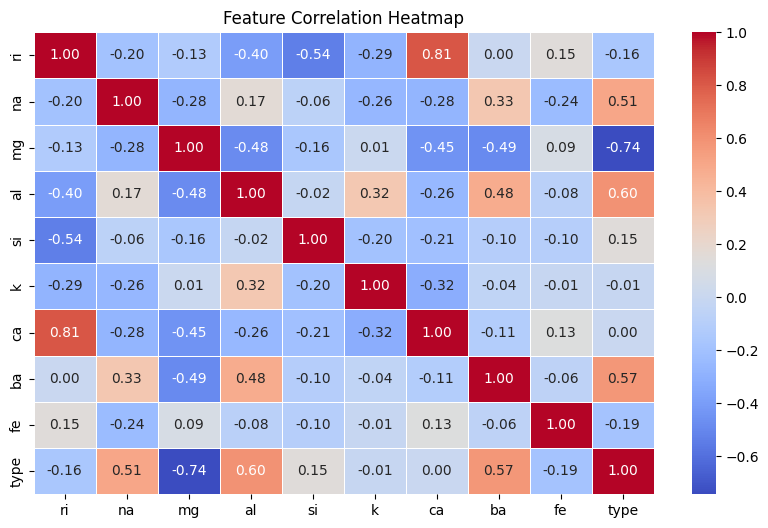

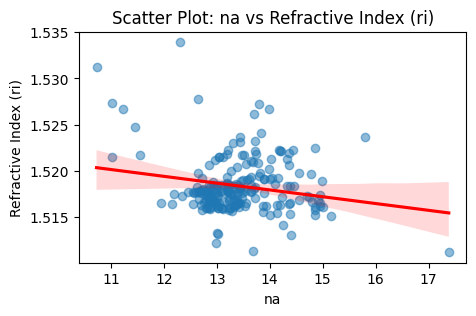

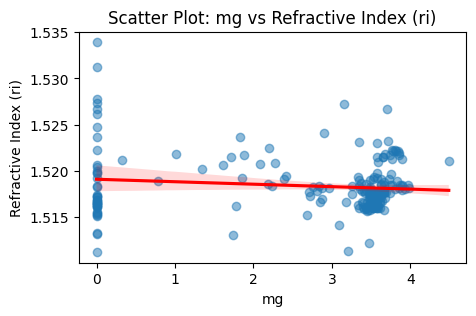

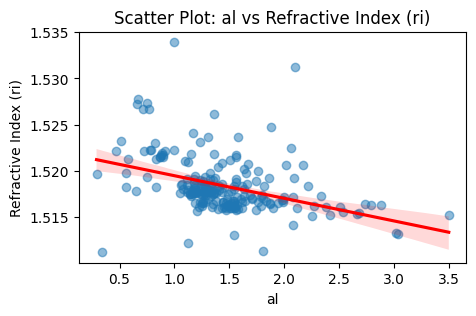

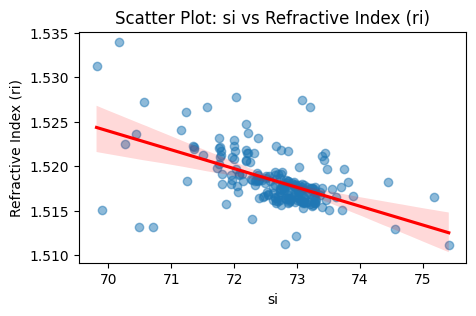

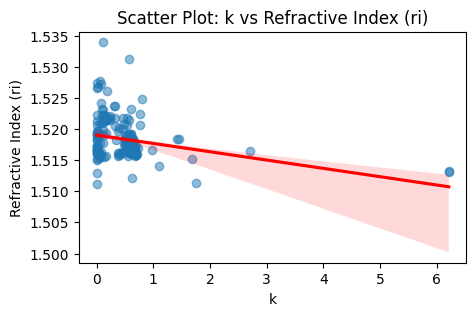

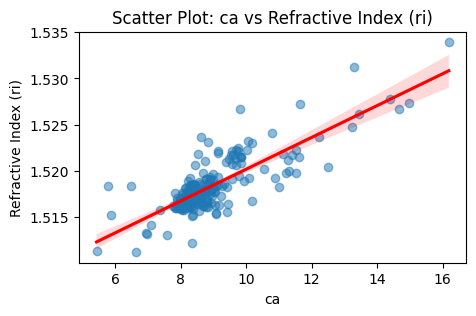

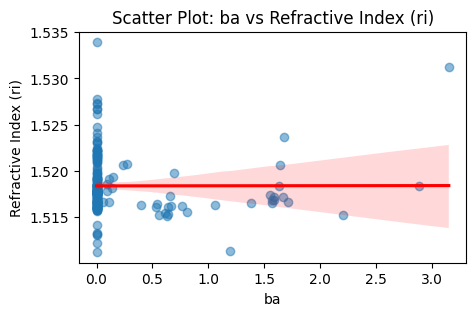

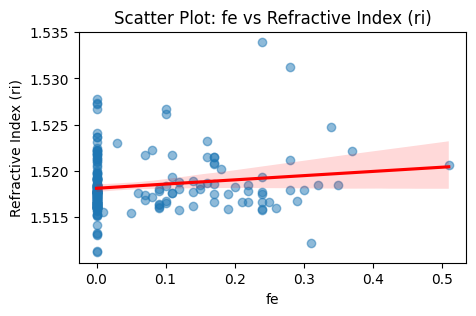

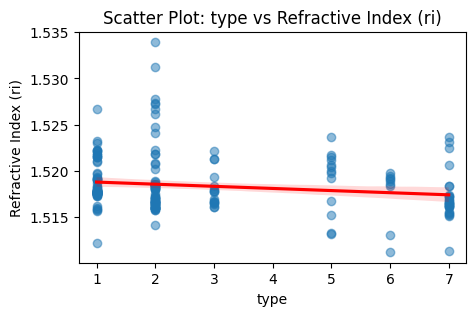


 Feature Selection Results (F-Statistic & P-Value):
  Feature     F-Value   P-Value
5      ca  405.991129  0.000000
3      si   86.401237  0.000000
2      al   40.423808  0.000000
4       k   19.032854  0.000020
0      na    8.682349  0.003574
8    type    5.553474  0.019360
7      fe    4.665585  0.031900
1      mg    3.488185  0.063195
6      ba    0.000595  0.980565

 Selected Features for Regression (p-value < 0.05):
['ca', 'si', 'al', 'k', 'na', 'type', 'fe']


In [ ]:
# Import necessary library

from sklearn.feature_selection import f_regression

# 1️ I will Check Linearity using a Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# 2️ Now  Linearity with Scatter Plots (Refractive Index vs the rest (Features))
# I need to Exclude 'ri' from feature list
features = [col for col in df.columns if col != "ri"]

# Create scatter plots for each feature vs 'ri'
for col in features:
    plt.figure(figsize=(5, 3))
    sns.regplot(x=df[col], y=df["ri"], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.title(f"Scatter Plot: {col} vs Refractive Index (ri)")
    plt.xlabel(col)
    plt.ylabel("Refractive Index (ri)")
    plt.show()

# 3️ Feature Selection using F-statistic (ANOVA for Regression)
X_reg = df.drop(columns=["ri"])  # Features
y_reg = df["ri"]  # Target variable

# Calcualation of  F-statistics & p-values
f_values, p_values = f_regression(X_reg, y_reg)

# Create DataFrame to store and display results easily

feature_importance = pd.DataFrame({"Feature": X_reg.columns, "F-Value": f_values, "P-Value": p_values})
feature_importance = feature_importance.sort_values(by="F-Value", ascending=False)
feature_importance["P-Value"] = feature_importance["P-Value"].round(6)
# Display top features based on F-values
print("\n Feature Selection Results (F-Statistic & P-Value):")
print(feature_importance)

# 4️ Select Features with p-value < 0.05 (it measn they are Statistically Significant)
selected_features = feature_importance[feature_importance["P-Value"] < 0.05]["Feature"].tolist()

# Print the stuff
print("\n Selected Features for Regression (p-value < 0.05):")
print(selected_features)

## Training Models

In [ ]:
from sklearn.linear_model import LinearRegression
# Defining Features and Target for Regression
drop=["ri"] # initially  I dropped columns wiht lowest score features and RI as we are predicitng it , and then tested different slutions and dropping different set of features
X_reg = df.drop(columns=drop)
y_reg = df["ri"]

# Train-test split (usual 80% training, 20% testing)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Scale features
scaler_reg = StandardScaler()
X_train_reg = scaler_reg.fit_transform(X_train_reg)
X_test_reg = scaler_reg.transform(X_test_reg)

#  Hyperparameter Tuning (Ridge & Lasso) to get the best alpha for the models
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

# Find best Ridge model
ridge_grid = GridSearchCV(Ridge(), param_grid, cv=5, scoring='r2', n_jobs=-1)
ridge_grid.fit(X_train_reg, y_train_reg)
best_ridge = ridge_grid.best_estimator_

# Find best Lasso model
lasso_grid = GridSearchCV(Lasso(), param_grid, cv=5, scoring='r2', n_jobs=-1)
lasso_grid.fit(X_train_reg, y_train_reg)
best_lasso = lasso_grid.best_estimator_

### - Training Regression Models - ###
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg, y_train_reg)
y_pred_lin = lin_reg.predict(X_test_reg)

# Best Ridge Regression
y_pred_ridge = best_ridge.predict(X_test_reg)

# Best Lasso Regression
y_pred_lasso = best_lasso.predict(X_test_reg)

# RandomForest Regressor
rf_reg = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_split=5, random_state=42)
rf_reg.fit(X_train_reg, y_train_reg)
y_pred_rf = rf_reg.predict(X_test_reg)

# MODEL EVALUATION
def evaluate_model(model_name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    print(f"\n {model_name} Performance:")
    print(f"R² Score: {r2:.3f}")
    print(f"Mean Squared Error (MSE): {mse:.6f}")
    print(f"Mean Absolute Error (MAE): {mae:.6f}")
    return r2, mse, mae

# Store evaluation results
results = {
    "Linear Regression": evaluate_model("Linear Regression", y_test_reg, y_pred_lin),
    "Best Ridge Regression": evaluate_model("Best Ridge Regression", y_test_reg, y_pred_ridge),
    "Best Lasso Regression": evaluate_model("Best Lasso Regression", y_test_reg, y_pred_lasso),
    "RandomForest Regressor": evaluate_model("RandomForest Regressor", y_test_reg, y_pred_rf),
}

# Feature Selection using Recursive Feature Elimination (RFE) #
rfe_selector = RFE(estimator=LinearRegression(), n_features_to_select=6)
X_train_rfe = rfe_selector.fit_transform(X_train_reg, y_train_reg)
X_test_rfe = rfe_selector.transform(X_test_reg)

# Training Linear Regression with selected features(and hoping to get better results)
lin_reg_rfe = LinearRegression()
lin_reg_rfe.fit(X_train_rfe, y_train_reg)
y_pred_rfe = lin_reg_rfe.predict(X_test_rfe)

# Evaluate RFE Model
results["Linear Regression (RFE)"] = evaluate_model("Linear Regression (RFE)", y_test_reg, y_pred_rfe)




 Linear Regression Performance:
R² Score: 0.756
Mean Squared Error (MSE): 0.000002
Mean Absolute Error (MAE): 0.000881

 Best Ridge Regression Performance:
R² Score: 0.756
Mean Squared Error (MSE): 0.000002
Mean Absolute Error (MAE): 0.000888

 Best Lasso Regression Performance:
R² Score: 0.700
Mean Squared Error (MSE): 0.000002
Mean Absolute Error (MAE): 0.000982

 RandomForest Regressor Performance:
R² Score: 0.615
Mean Squared Error (MSE): 0.000003
Mean Absolute Error (MAE): 0.001083

 Linear Regression (RFE) Performance:
R² Score: 0.780
Mean Squared Error (MSE): 0.000002
Mean Absolute Error (MAE): 0.000843


## Visualizations

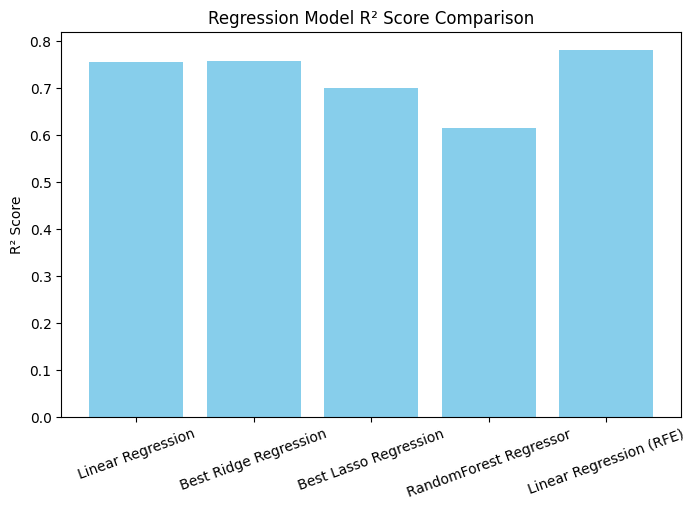

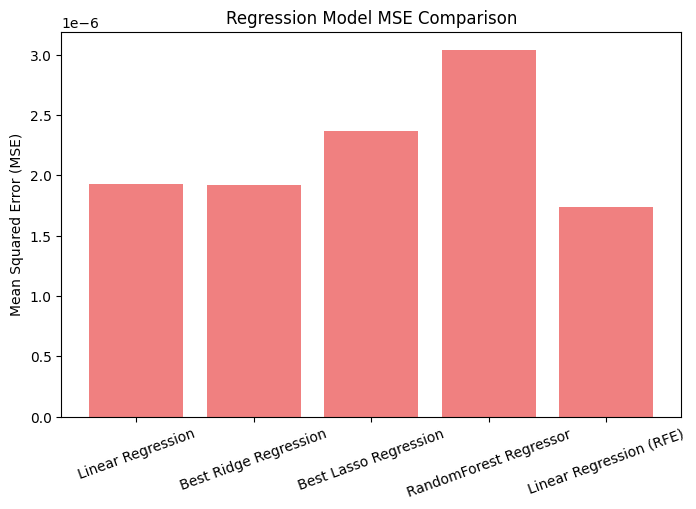

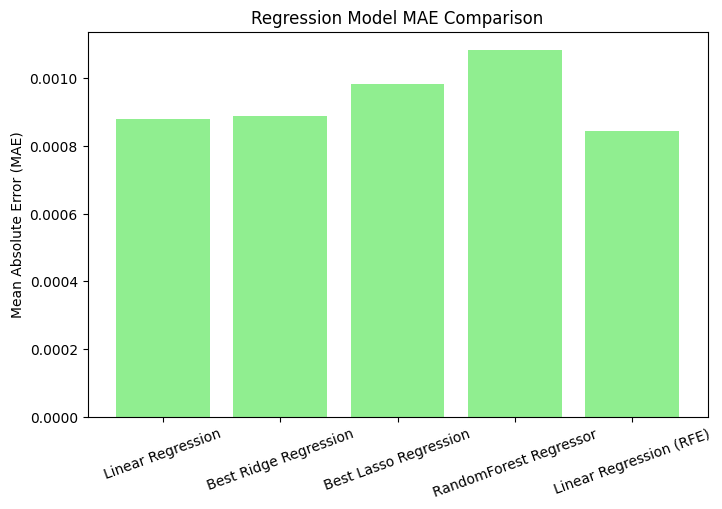

In [ ]:

# 1️ R² Score Comparison
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), [r[0] for r in results.values()], color='skyblue')
plt.ylabel("R² Score")
plt.title("Regression Model R² Score Comparison")
plt.xticks(rotation=20)
plt.show()

# 2️ MSE Comparison
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), [r[1] for r in results.values()], color='lightcoral')
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Regression Model MSE Comparison")
plt.xticks(rotation=20)
plt.show()

# 3️ MAE Comparison
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), [r[2] for r in results.values()], color='lightgreen')
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Regression Model MAE Comparison")
plt.xticks(rotation=20)
plt.show()

## Final Touch with Pipeline and RFECV


 Pipeline with RFECV & Linear Regression Performance:
R² Score: 0.775
Mean Squared Error (MSE): 0.000002
Mean Absolute Error (MAE): 0.000851

 Selected Features from RFECV:
Index(['mg', 'al', 'si', 'ca', 'ba'], dtype='object')


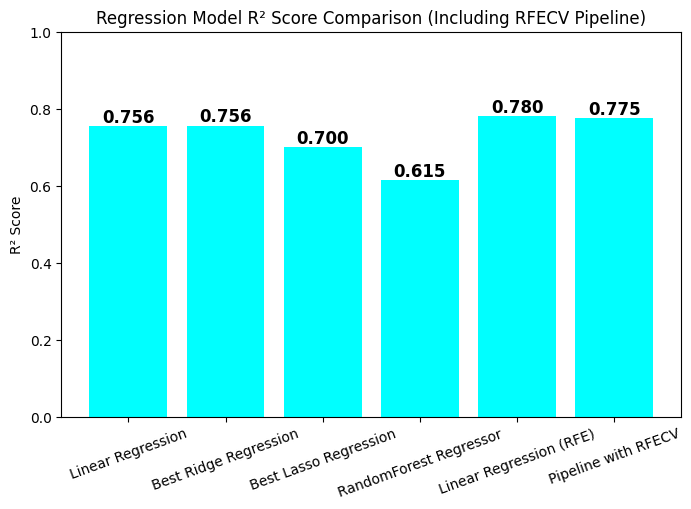

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFECV

# Making Pipeline for Feature Selection and Regression
pipeline = Pipeline([
    ("feature_selection", RFECV(estimator=LinearRegression(), step=1, cv=5, scoring="r2")),
    ("regressor", LinearRegression())
])

# Fiting pipeline on training data
pipeline.fit(X_train_reg, y_train_reg)

# Selecting  features
selected_features = X_reg.columns[pipeline.named_steps["feature_selection"].support_]

# Predictions using the final model
y_pred_pipeline = pipeline.predict(X_test_reg)

# Evaluation of the the final model
def evaluate_model(model_name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    print(f"\n {model_name} Performance:")
    print(f"R² Score: {r2:.3f}")
    print(f"Mean Squared Error (MSE): {mse:.6f}")
    print(f"Mean Absolute Error (MAE): {mae:.6f}")
    return r2, mse, mae

pipeline_results = evaluate_model("Pipeline with RFECV & Linear Regression", y_test_reg, y_pred_pipeline)

# Update results dictionary (that I created previously)
results["Pipeline with RFECV"] = pipeline_results

# Display the selected features
print("\n Selected Features from RFECV:")
print(selected_features)

# R² Score Comparison with values displayed on top of bars
plt.figure(figsize=(8, 5))
bars = plt.bar(results.keys(), [r[0] for r in results.values()], color='cyan')

# This is text on top of bars for actual R² scores
for bar, r2_score in zip(bars, [r[0] for r in results.values()]):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{r2_score:.3f}", ha='center', fontsize=12, fontweight='bold')

plt.ylabel("R² Score")
plt.title("Regression Model R² Score Comparison (Including RFECV Pipeline)")
plt.xticks(rotation=20)
plt.ylim(0, 1)  # Ensuring the scale remains between 0 and 1 for R² scores
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#	Visualizing Findings & Results

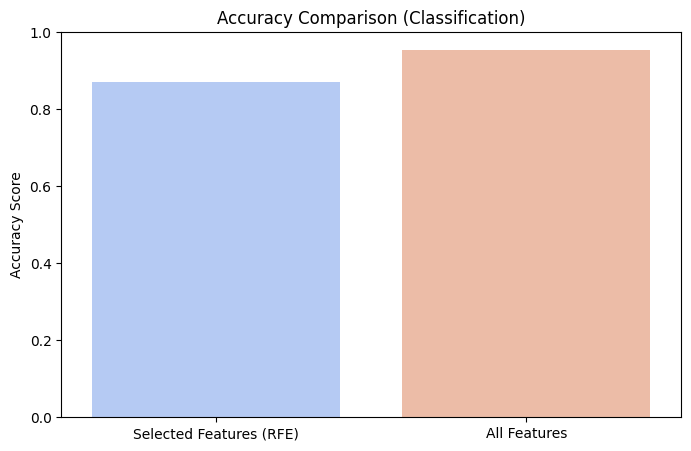

In [ ]:
# Visualizing Regression Model Performance
models = ["Linear Regression", "Best Ridge Regression", "Best Lasso Regression", "RandomForest Regressor", "Linear Regression (RFE)"]
r2_scores = [results[m][0] for m in models]
mse_scores = [results[m][1] for m in models]
mae_scores = [results[m][2] for m in models]

# Classification Performance Comparison (Before & After Feature Selection)
accuracies = [accuracy_selected, accuracy_all]
labels = ["Selected Features (RFE)", "All Features"]

plt.figure(figsize=(8, 5))
sns.barplot(x=labels, y=accuracies, palette="coolwarm")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Comparison (Classification)")
plt.ylim(0, 1)
plt.show()


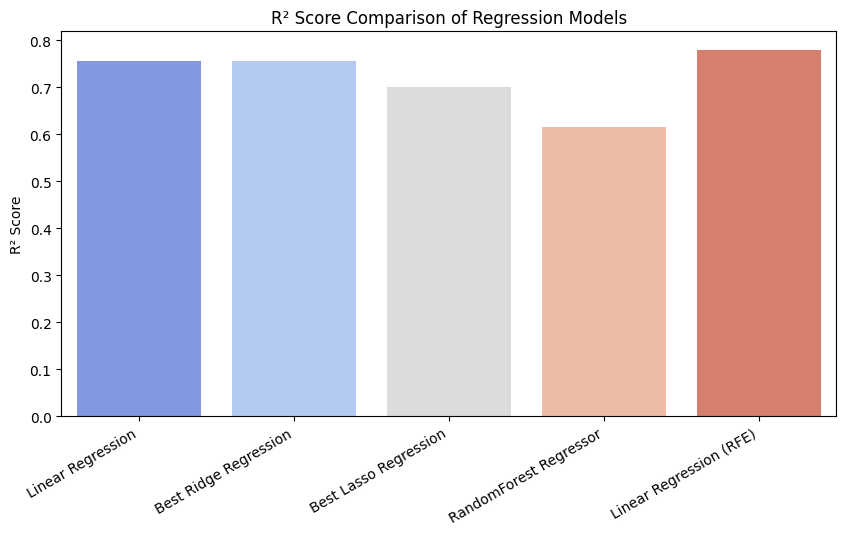

In [ ]:
# R² Score Comparison
plt.figure(figsize=(10, 5))
sns.barplot(x=models, y=r2_scores, palette="coolwarm")
plt.xticks(rotation=30, ha="right")
plt.ylabel("R² Score")
plt.title("R² Score Comparison of Regression Models")
plt.show()

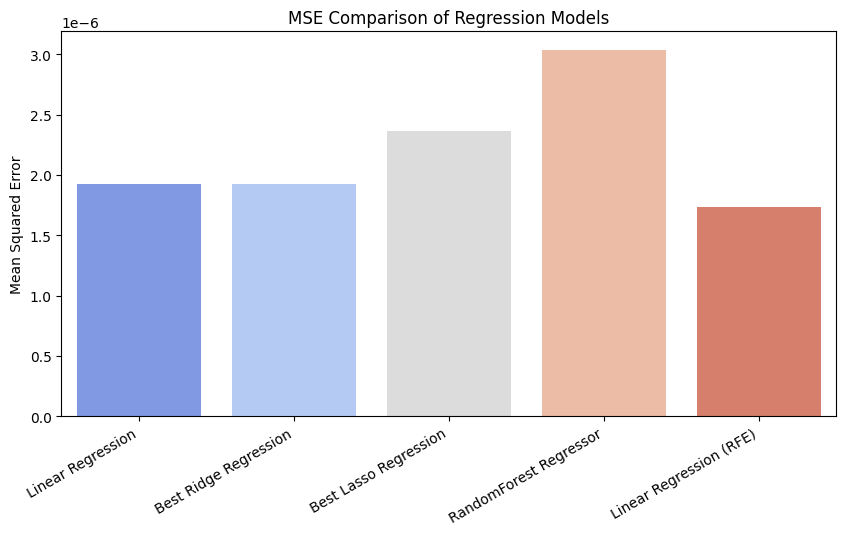

In [ ]:
# MSE Comparison
plt.figure(figsize=(10, 5))
sns.barplot(x=models, y=mse_scores, palette="coolwarm")
plt.xticks(rotation=30, ha="right")
plt.ylabel("Mean Squared Error")
plt.title("MSE Comparison of Regression Models")
plt.show()

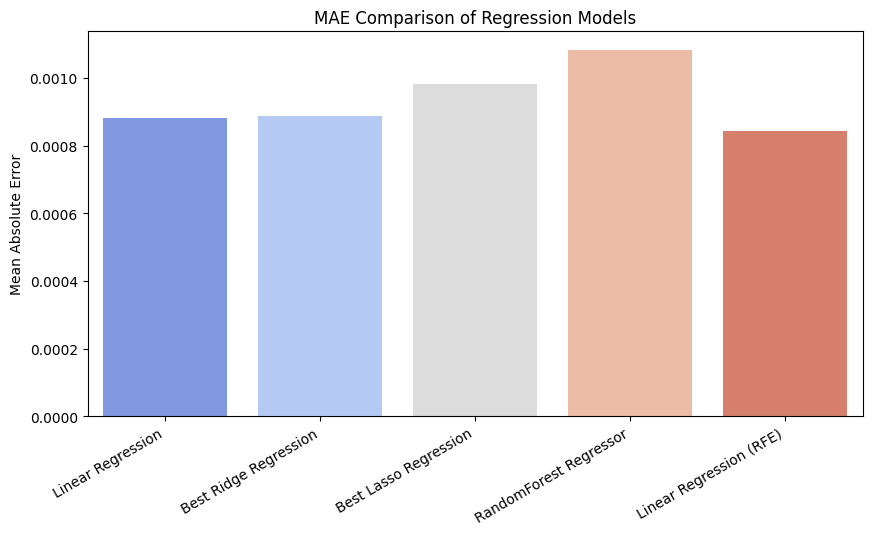

In [ ]:
# MAE Comparison
plt.figure(figsize=(10, 5))
sns.barplot(x=models, y=mae_scores, palette="coolwarm")
plt.xticks(rotation=30, ha="right")
plt.ylabel("Mean Absolute Error")
plt.title("MAE Comparison of Regression Models")
plt.show()


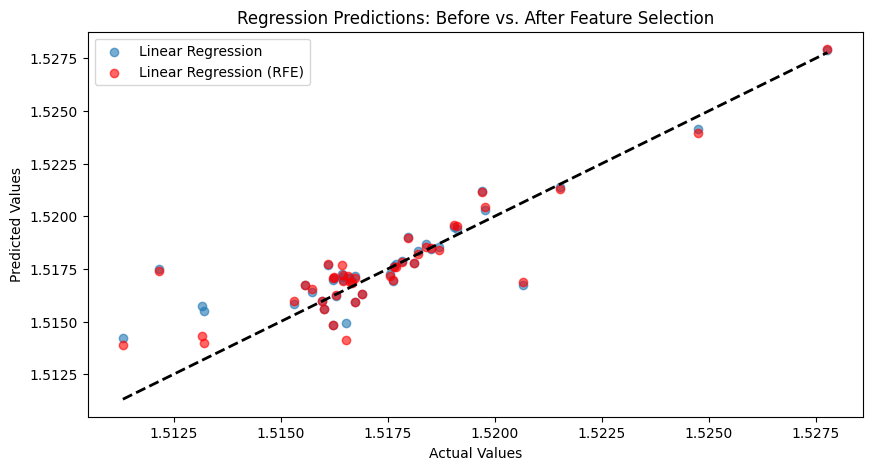

In [ ]:
# Scatter Plot for Regression Predictions (Before & After Feature Selection)
plt.figure(figsize=(10, 5))
plt.scatter(y_test_reg, y_pred_lin, label="Linear Regression", alpha=0.6)
plt.scatter(y_test_reg, y_pred_rfe, label="Linear Regression (RFE)", alpha=0.6, color='red')
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], 'k--', lw=2)  # Ideal Fit Line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Regression Predictions: Before vs. After Feature Selection")
plt.legend()
plt.show()

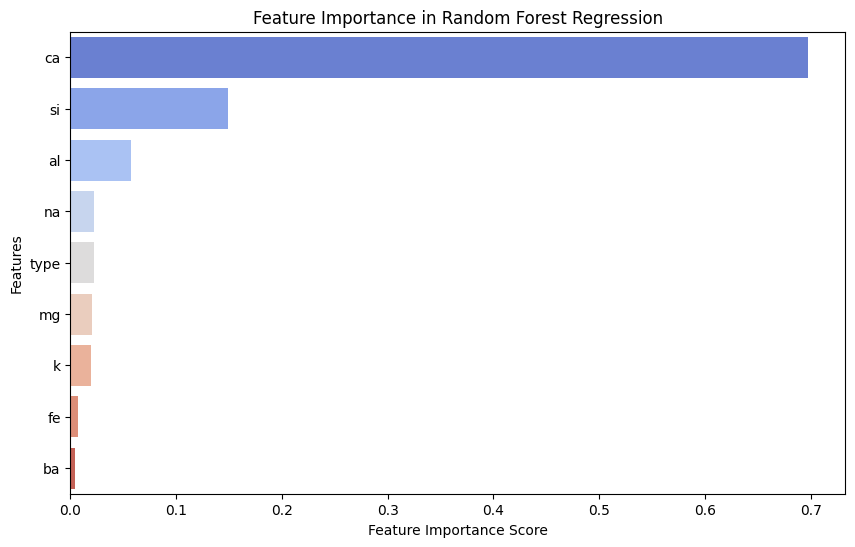

In [ ]:
# Heatmap of Feature Importance (Random Forest Regression)
feature_importance = pd.Series(rf_reg.feature_importances_, index=X_reg.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index, palette="coolwarm")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest Regression")
plt.show()

# References

1️ Data Preprocessing & Exploratory Data Analysis (EDA)
Handling Missing Values & Duplicates

Pandas Development Team (2024). Pandas: Python Data Analysis Library. Available at: https://pandas.pydata.org/docs/index.html .

Outlier Detection (IQR Method)
Tukey, J.W. (1977). Exploratory Data Analysis. Reading, MA: Addison-Wesley.

Online Explanation: https://towardsdatascience.com/outlier-detection-with-iqr-method-in-python-ff2946c4b858
Feature Correlation Analysis (Heatmap)
Seaborn Development Team (2024). Seaborn: Statistical Data Visualization. Available at: https://seaborn.pydata.org/generated/seaborn.heatmap.html .

2️ Feature Selection
F-statistic (ANOVA) for Feature Selection
Fisher, R.A. (1925). Statistical Methods for Research Workers. Edinburgh: Oliver & Boyd.

Python Code Example: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html
Recursive Feature Elimination (RFE)
Guyon, I., & Elisseeff, A. (2003). "An introduction to variable and feature selection." Journal of Machine Learning Research, 3, pp.1157–1182.

Python Example with Code: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
Recursive Feature Elimination with Cross-Validation (RFECV)
Kuhn, M., & Johnson, K. (2013). Applied Predictive Modeling. New York: Springer.

RFECV Code Guide: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html


3️ Machine Learning Models
Random Forest Classifier & Regressor
Breiman, L. (2001). "Random forests." Machine Learning, 45(1), pp.5–32.

Random Forest Python Tutorial: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Random Forest Python Example: https://www.datacamp.com/tutorial/random-forests-classifier-python
Logistic Regression (Classification)
Cox, D.R. (1958). "The regression analysis of binary sequences." Journal of the Royal Statistical Society: Series B (Methodological), 20(2), pp.215–242.

Logistic Regression in Python: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Full Logistic Regression Guide: https://realpython.com/logistic-regression-python/
K-Nearest Neighbors (KNN)
Cover, T.M., & Hart, P.E. (1967). "Nearest neighbor pattern classification." IEEE Transactions on Information Theory, 13(1), pp.21–27.

KNN in Python (With Code): https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Beginner-Friendly KNN Guide: https://towardsdatascience.com/k-nearest-neighbors-knn-algorithm-bd375d16eec8
Decision Tree Classifier & Regressor
Quinlan, J.R. (1986). "Induction of decision trees." Machine Learning, 1, pp.81–106.

Decision Trees in Python: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Interactive Decision Tree Guide: https://towardsdatascience.com/decision-tree-algorithm-explained-83beb6e78ef4
XGBoost (Extreme Gradient Boosting)
Chen, T., & Guestrin, C. (2016). "XGBoost: A scalable tree boosting system." Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining (KDD’16), pp.785–794.


4️. Data Balancing Techniques

Synthetic Minority Over-sampling Technique (SMOTE)
Chawla, N.V., Bowyer, K.W., Hall, L.O., & Kegelmeyer, W.P. (2002). "SMOTE: Synthetic Minority Over-sampling Technique." Journal of Artificial Intelligence Research, 16, pp.321–357.

SMOTE in Python (With Code): https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

Data Balancing with SMOTE: https://towardsdatascience.com/a-guide-to-imbalanced-classification-with-smote-in-python-5c86da34b23a
5️ Hyperparameter Tuning

GridSearchCV
Bergstra, J., & Bengio, Y. (2012). "Random search for hyper-parameter optimization." Journal of Machine Learning Research, 13, pp.281–305.

GridSearchCV Python Code: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Guide to Grid Search: https://towardsdatascience.com/grid-search-for-model-tuning-3319b259367e

6 Visualization

Waskom, M. (2024). Seaborn: Statistical Data Visualization in Python. Available at: https://seaborn.pydata.org/generated/seaborn.regplot.html .

McKinney, W. (2011). Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython. O'Reilly Media.
 Seaborn Usage Guide: https://seaborn.pydata.org/tutorial/regression.html

Hunter, J.D. (2007). "Matplotlib: A 2D graphics environment." Computing in Science & Engineering, 9(3), pp.90–95.
 Matplotlib Guide: https://matplotlib.org/stable/contents.html
